Official code for project

test for load the generated data from the .mat file


Instructions for updating:
non-resource variables are not supported in the long term
Gaussian IC Case: K=4, Total Samples: 10000, Total Iterations: 150

shape of X (144, 10000)
train DNN ...
train: 9000  validation: 1000 
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
epoch:0,  train:18.15%,  validation:18.11%.
epoch:15,  train:13.68%,  validation:13.39%.
epoch:30,  train:7.45%,  validation:8.12%.
epoch:45,  train:6.94%,  validation:7.16%.
epoch:60,  train:6.22%,  validation:6.96%.
epoch:75,  train:5.81%,  validation:6.63%.
epoch:90,  train:5.40%,  validation:6.50%.
epoch:105,  train:5.15%,  validation:6.33%.
epoch:120,  train:4.71%,  validation:6.33%.
epoch:135,  train:4.45%,  validation:6.24%.
training time: 12.87 s
----------------------------------------------------------------
training check
----

C:\Users\11345\AppData\Local\Temp\ipykernel_16764\2886423860.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('wmmse time: %0.3f s, dnn time: %0.3f s, time speed up: %0.1f X' % (wmmsetime, dnntime, wmmsetime / dnntime))


wmmse time: 4.574 s, dnn time: 0.030 s, time speed up: 155.0 X


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Sum-rate: WMMSE: 15.162, DNN: 12.737, Max Power: 4.746, Random Power: 4.779
Ratio: DNN: 84.006%, Max Power: 31.299%, Random Power: 31.521%



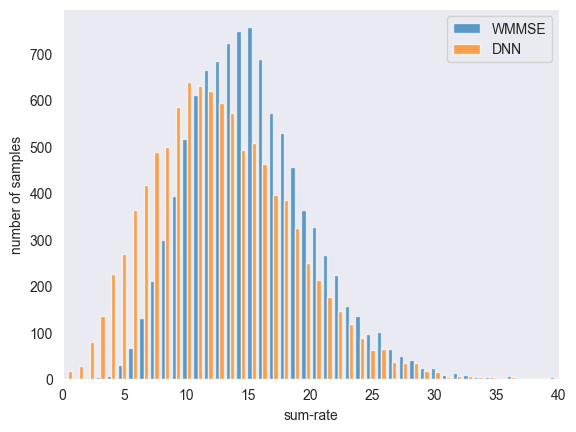

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


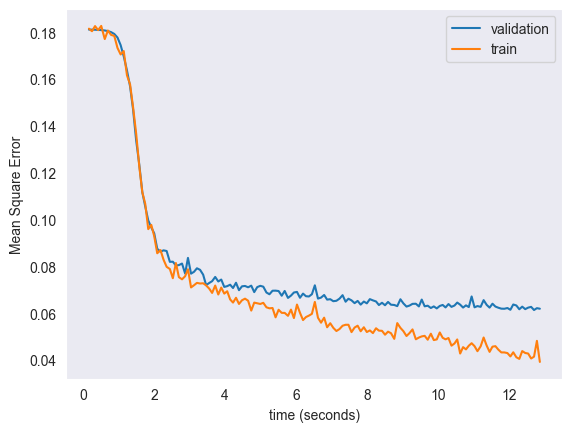

In [1]:
import scipy.io as sio                     # import scipy.io for .mat file I/O 
import numpy as np                         # import numpy
import matplotlib.pyplot as plt            # import matplotlib.pyplot for figure plotting
import function_wmmse_powercontrol as wf   # import our function file
import function_dnn_powercontrol as df     # import our function file


K = 4                  # number of users
#num_H = 25000              # number of training samples
#num_test = 5000            # number of testing  samples
training_epochs = 150      # number of training epochs
trainseed = 0              # set random seed for training set
testseed = 7               # set random seed for test set
num_BS = 3                 #number of base station 
num_User = K               #number of users
num_H = 10000                #number of sample
R = 100                     #communication range of the base station
minR_ratio =  0         #The user can only land at a distance r from the cell center
seed = 1
var_noise = 1
batch_size= 1000             #training batch size is 1000

# Problem Setup
print('Gaussian IC Case: K=%d, Total Samples: %d, Total Iterations: %d\n'%(K, num_H, training_epochs))

# Generate Training Data
Xtrain, Ytrain, wtime = wf.generate_IMAC_tst1(num_BS, num_User, num_H)
print('shape of X',Xtrain.shape)
# Training Deep Neural Networks
print('train DNN ...')
# Save & Load model from this path 
model_location = "./DNNmodel/model_demo.ckpt"
df.train(Xtrain, Ytrain, model_location,
         training_epochs=training_epochs, traintestsplit = 0.1, 
         batch_size=batch_size)

print('----------------------------------------------------------------')
print('training check')
print('----------------------------------------------------------------')


X, Y, wmmsetime = wf.generate_IMAC_tst1(num_BS, num_User, num_H)
print('---------------------')
print(K,num_BS,num_H)

# Testing Deep Neural Networks
dnntime = df.test(X, model_location, "Prediction_%d" % K ,
                  K* K * num_BS *num_BS, K* num_BS, binary=0)
print('wmmse time: %0.3f s, dnn time: %0.3f s, time speed up: %0.1f X' % (wmmsetime, dnntime, wmmsetime / dnntime))

# Evaluate Performance of DNN and WMMSE
H = np.reshape(X, (K*num_BS, K*num_BS,X.shape[1]), order="F").astype(float)
NNVbb = sio.loadmat('Prediction_%d' % K)['pred']
wf.perf_eval(H, Y, NNVbb, num_BS,K)

# Plot figures
train = sio.loadmat('MSETime_%d_%d_%d'%(K*num_BS, batch_size, 10))['train']
time = sio.loadmat('MSETime_%d_%d_%d'%(K*num_BS, batch_size, 10))['time']
val = sio.loadmat('MSETime_%d_%d_%d'%(K*num_BS, batch_size, 10))['validation']
plt.figure(0)
plt.plot(time.T, val.T,label='validation')
plt.plot(time.T, train.T,label='train')
plt.legend(loc='upper right')
plt.xlabel('time (seconds)')
plt.ylabel('Mean Square Error')
plt.savefig('MSE_train.eps', format='eps', dpi=1000)
plt.show()
